<a href="https://colab.research.google.com/github/SurajK7/ChestAI/blob/master/Edema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!nvidia-smi

Mon May 18 09:19:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
%reload_ext autoreload
%autoreload 2

In [0]:
from fastai.vision import *
from torchvision.models import *
from utils import create_dfs, create_data, print_val_score, chexpert_targets, u_one_features, u_zero_features
import pandas as pd
from pathlib import Path

In [0]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Yfgf4D7P224j8Z4CJ6-sq0sFLzqlRhxE' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Yfgf4D7P224j8Z4CJ6-sq0sFLzqlRhxE" -O CheXpert-v1.0-small.zip && rm -rf /tmp/cookies.txt

In [0]:
!unzip -qq CheXpert-v1.0-small.zip
!rm CheXpert-v1.0-small.zip

In [0]:
full_train_df, full_valid_df = create_dfs()
full_df = pd.concat([full_train_df, full_valid_df])

In [0]:
# function to create class labels
def feature_string(row):
  if row['Edema'] in [-1, 1]:
      return 'Edema'
  else:
    return ''

In [0]:
#adding class labels
full_df['feature_string'] = full_df.apply(feature_string,axis = 1).fillna('')

In [0]:
data = create_data(full_df, size=320, bs=56)

In [0]:
learn = cnn_learner(data, models.densenet121, pretrained=True)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07
Min loss divided by 10: 8.32E-03


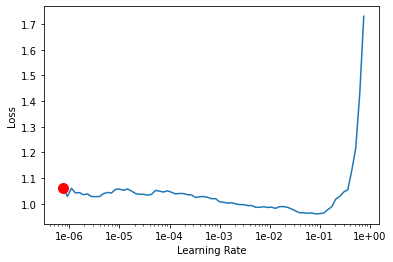

In [0]:
lr_find(learn)
learn.recorder.plot(suggestion=True)

In [0]:
lr = 1e-2

In [0]:
learn.fit_one_cycle(8, slice(lr), callbacks=[callbacks.SaveModelCallback(learn, every='epoch', name='Edema')])

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!mkdir /content/drive/My\ Drive/Edema

In [0]:
!cp -avr ./models /content/drive/My\ Drive/Edema

In [0]:
print_val_score(learn, full_valid_df)

Edema_3


0.9168173598553345
Edema_7


0.9181735985533455
Edema_6


0.921036769138035
Edema_4


0.9037070524412296
Edema_5


0.9059674502712478
Edema_1


0.9171187462326703
Edema_2


0.9296262808921038
Edema_0


0.9159132007233273
